# Лабораторная работа по модулю “Построение моделей”

### 1. Загрузить данные из папки Data Folder.

In [35]:
import pandas as pd
import numpy as np
%pylab inline
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 10,10
pd.set_option('display.max_columns', 100)

import warnings
warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('flag.csv')

In [3]:
data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,1.1,1.2,0.1,1.3,1.4,1.5,0.2,green,0.3,0.4,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black


In [4]:
afg = data.columns

In [5]:
col_names = ['country', 'landmass', 'zone', 'area', 'population', 'languag', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'dominantcolour', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'traingle', 'icon', 'animate', 'text', 'topleftcolour', 'botrightcolor']

In [6]:
data.columns = col_names

In [7]:
afg = pd.DataFrame(afg).T
afg.columns = col_names

data = data.append(afg, ignore_index=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
country           194 non-null object
landmass          194 non-null object
zone              194 non-null object
area              194 non-null object
population        194 non-null object
languag           194 non-null object
religion          194 non-null object
bars              194 non-null object
stripes           194 non-null object
colours           194 non-null object
red               194 non-null object
green             194 non-null object
blue              194 non-null object
gold              194 non-null object
white             194 non-null object
black             194 non-null object
orange            194 non-null object
dominantcolour    194 non-null object
circles           194 non-null object
crosses           194 non-null object
saltires          194 non-null object
quarters          194 non-null object
sunstars          194 non-null object
crescent          194

### 2. Провести описательный анализ предложенных данных

**В наших данных отсутствуют пропуски. Достаточно большое количество категориальных переменных (большинство). Данные чистые и их совсем немного.** 

**Посмотрим на количество стран каждой религии.** 

**religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others**

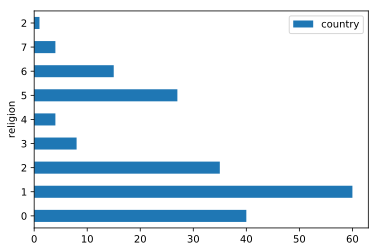

In [9]:
data[['religion', 'country']].groupby('religion').count().plot(kind='barh')

### 3. Предложить стратегию по работе с категориальными переменными

**Для работы с категориальными переменными мы будем использовать get_dummies. Составим массив этих переменных.**

In [10]:
y = data['religion'].astype(int)
data = data.drop(columns=['religion'])

int_columns = np.array(['area', 'population', 'bars', 'stripes', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'traingle', 'icon', 'animate', 'text'])
obj_columns = np.array([ x for x in data.columns if x not in int_columns ])
data[int_columns] = data[int_columns].astype(float)

In [11]:
df = pd.get_dummies(data, columns=obj_columns)

In [12]:
df = df.T.drop_duplicates().T
columns = df.columns

In [13]:
len(columns)

269

Мы получили 269 колонок.

### 4. Провести углубленный анализ данных (корреляции переменных,визуализация взаимосвязей)

**Для поиска корреляций в наших данных требуется перевести в тип float те переменные которые являются количественными.** 

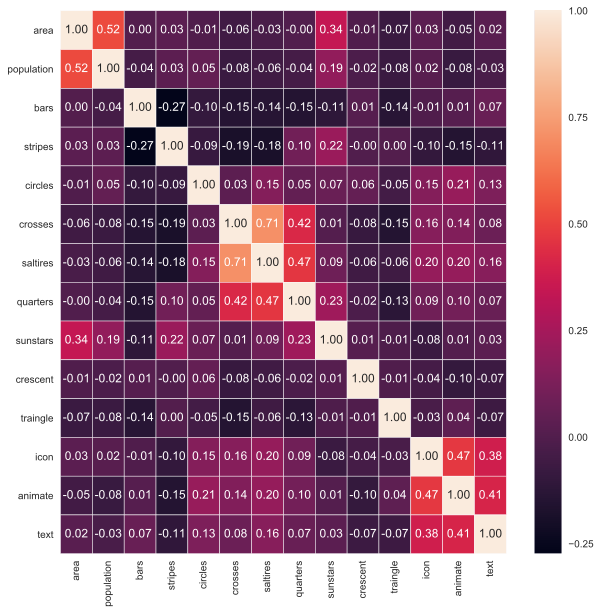

In [36]:
import seaborn as sns
sns.set()
sns.heatmap(data[int_columns].corr(), annot=True, fmt=".2f",
            linewidths=0.5);

**Видно, что есть положительная корреляция между количество населения и площадью, а также, например, между crosses и saltires**

**Можно визуализировать взаимосвязь между популяцией и площадью.**

(0, 3000)

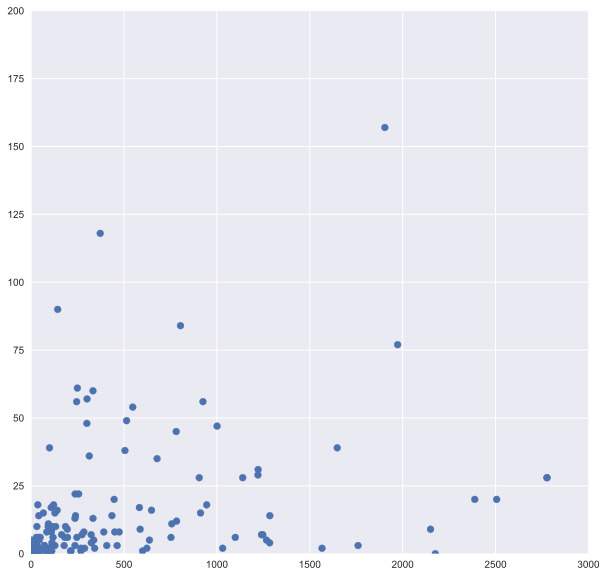

In [37]:
plt.scatter(data.area, data.population)
plt.ylim(0, 200)
plt.xlim(0 , 3000)

**Видно, что какой-то очевидной функциональной зависимости нет.**

### 5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 269 entries, area to botrightcolor_white
dtypes: float64(269)
memory usage: 407.8 KB


**В целом у нас мало данных (194 x 269), 407.8 KB, поэтому лучше использовать все данные, чтобы не терять в точности.**

### 6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)

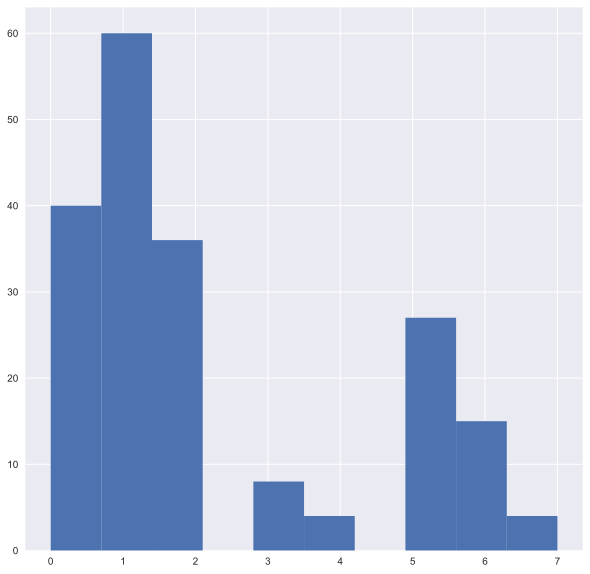

In [59]:
y.hist()

**В целом у нас есть классы, количество которых заметно меньше, чем других (это классы 3, 4, 7). Так что балансировка классов была бы полезна.**

### 7. Решить задачу мультиклассовойклассификации и предсказать религию страны(religion)по деталям ее флага

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [40]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, f1_score, precision_score

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth':range(1, 7, 1),
    'learning_rate':np.arange(0.1, 0.4, 0.1),
}

gsearch1 = GridSearchCV(
            estimator=XGBClassifier(),
            param_grid = parameters,
            scoring='accuracy',
            n_jobs=-1,
            iid=False,
            cv=3
)
gsearch1.fit(X_train, y_train)
gsearch1.best_params_

{'learning_rate': 0.1, 'max_depth': 1}

In [41]:
clf = XGBClassifier(
   max_depth=gsearch1.best_params_['max_depth'],
   learning_rate=gsearch1.best_params_['learning_rate'],
)


clf.fit(X_train, y_train)

y_test_predict = clf.predict(X_test)

In [42]:
recall_score(y_test, y_test_predict, average='weighted')

0.6410256410256411

In [43]:
accuracy_score(y_test, y_test_predict)

0.6410256410256411

In [44]:
f1_score(y_test, y_test_predict, average='weighted')

0.6635295038041035

In [45]:
precision_score(y_test, y_test_predict, average='weighted')

0.7622377622377622

### 8.Сделать кросс-валидациюданных с использованием подхода K-fold

Для более адекватной оценкци качества модели проведем кросс-валидацию.

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
results = cross_val_score(clf, X_train, y_train, cv=kf)

In [47]:
results.mean()

0.7041666666666667

In [48]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10)

def cross_val(clf, X_train, y_train, X_test, y_test, stack_cv):
    stacked_test = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        stacked_test += clf.predict(X_test)
    stacked_test = stacked_test / stack_cv.n_splits
    return stacked_test.round(0)

In [49]:
y_cross = cross_val(clf, X_train, y_train, X_test, y_test, stack_cv)

In [50]:
recall_score(y_test, y_cross, average='weighted')

0.5641025641025641

In [51]:
accuracy_score(y_test, y_cross)

0.5641025641025641

In [52]:
f1_score(y_test, y_cross, average='weighted')

0.5951557423129329

In [53]:
precision_score(y_test, y_cross, average='weighted')

0.6564685314685315

### 9.Рассчитать Feature Importances для переменных модели.

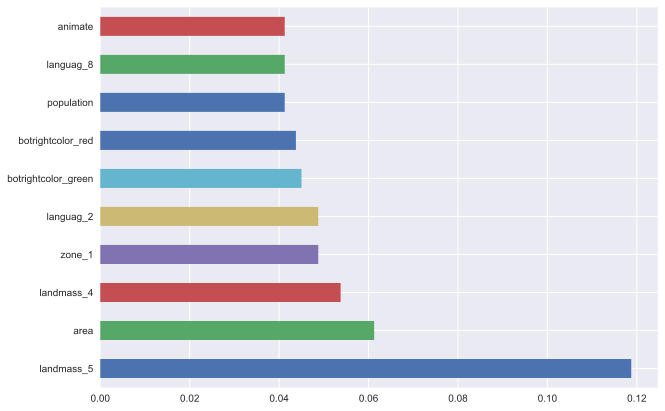

In [54]:
IDcol = 'Id'
y_label = 'SalePrice'
predictors = [x for x in columns if x not in [y_label, IDcol]]
plt.figure(figsize=(10,7))
(pd.Series(clf.feature_importances_, predictors).sort_values(ascending=False))[:10].plot(kind='barh')

### 10. Построить Confusion Matrix для ваших результатов.

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_predict)

array([[4, 2, 0, 0, 1, 0],
       [1, 8, 0, 0, 3, 0],
       [0, 0, 8, 1, 2, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 4, 0],
       [2, 0, 0, 1, 0, 1]], dtype=int64)